In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def hann_window(N):
    return torch.hann_window(N)

In [ ]:
def generate_spectrograms(audio_path, genre_name):
    waveform, sample_rate = torchaudio.load(audio_path)
    n_fft = 2048
    hop_length = 512

    # Compute STFT with different windows
    stft_hann = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length, window=hann_window(n_fft), return_complex=True)

    # Convert to dB for visualization
    stft_hann_db = 20 * torch.log10(torch.abs(stft_hann) + 1e-6)

    # Plot spectrograms
    plt.figure(figsize=(15, 10))

    def plot_spectrogram(stft_db, title, subplot):
        plt.subplot(3, 1, subplot)
        plt.imshow(stft_db[0].numpy(), aspect='auto', origin='lower', cmap='inferno')
        plt.colorbar(format='%+2.0f dB')
        plt.title(title)

    plot_spectrogram(stft_hann_db, f'{genre_name} - Hann Window', 1)

    plt.tight_layout()
    plt.show()


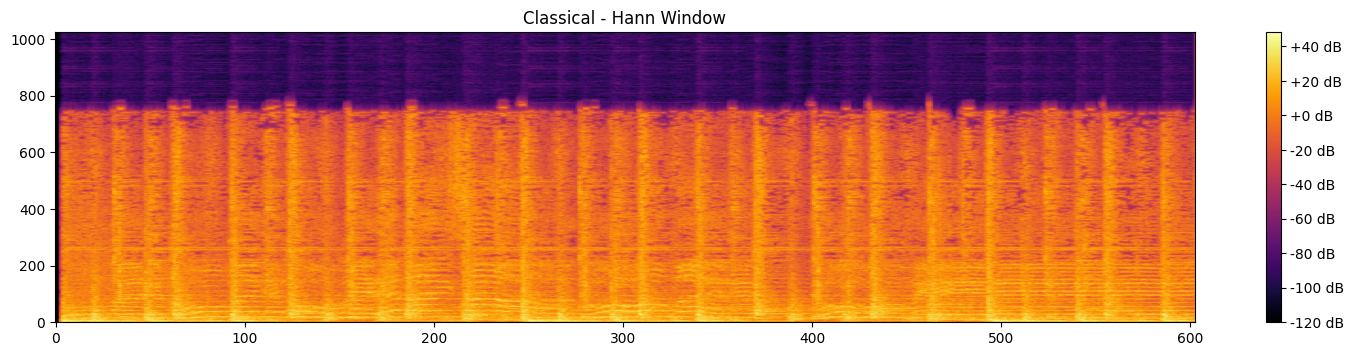

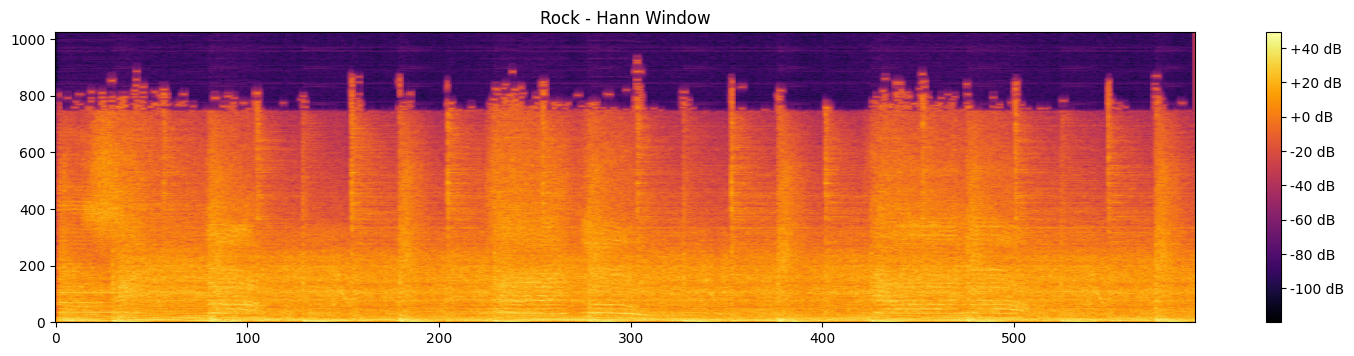

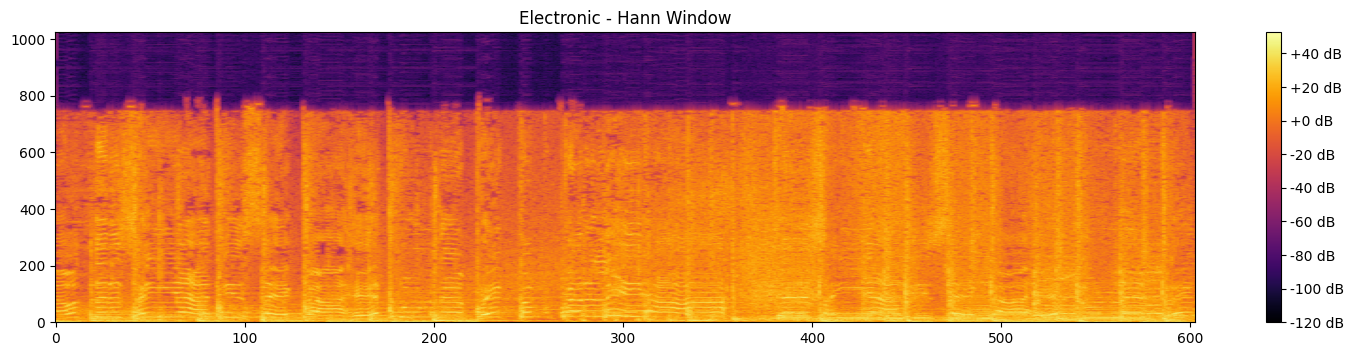

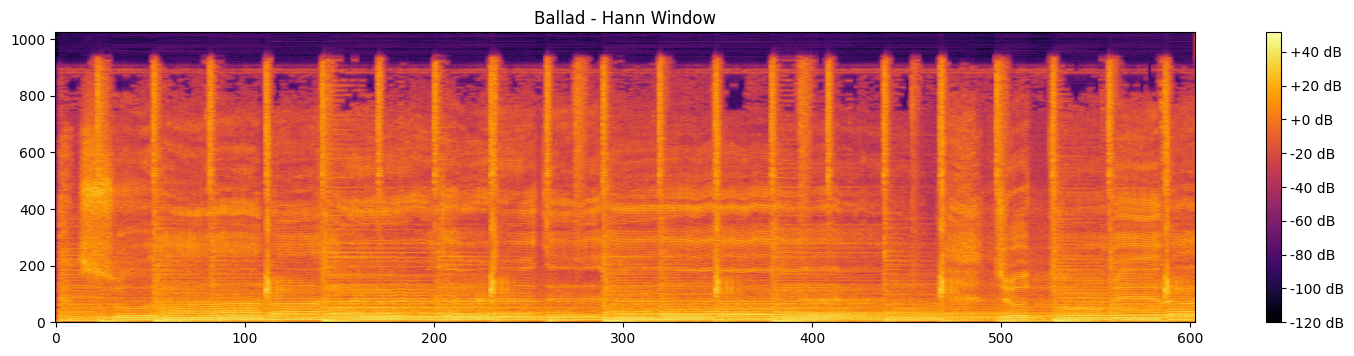

In [ ]:
generate_spectrograms("/content/128-ghoomar-padmaavat-128-kbps_0QEt47Wf.mp3", "Classical")
generate_spectrograms("/content/zinda-bhaag-milkha-bhaag-320-kbps_JdeWN5ju.mp3", "Rock")
generate_spectrograms("/content/the-breakup-song-ae-dil-hai-mushkil-320-kbps_oNuA1qhX.mp3", "Electronic")
generate_spectrograms("//content/humdard-ek-villain-320-kbps_ecLjTuE7.mp3", "Ballad")